<center><h1>Airbnb Data Analysis</h1></center>
<center> <img src = "./Gallery/Airbnb Logo.png" width = "800"> </center>

<h3>Import Libraries</h3>

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import warnings
warnings.filterwarnings("ignore")

<h3>Reading Data</h3>

In [296]:
df = pd.read_csv("./Airbnb data.csv")

In [297]:
df.head(2)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...


<h3>Cleaning Data</h3>

<h5>1. Dropping Irrelevant Features</h5>

In [298]:
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

<p>Features Like 'room_id', 'survey_id', 'host_id', 'last_modified' seems to be irrelavant features</p>

In [299]:
df = df.drop(columns=['survey_id', 'host_id', 'last_modified','location'], axis = 1)

In [300]:
df.head(1)

,room_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,latitude,longitude
0,10176931,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),52.356209,4.887491


<h5>2. Renaming Columns</h5>

In [301]:
df = df.rename(columns={"minstay":"minutes_stayed", "neighborhood":"neighbourhood"})
df.head(1)

,room_id,room_type,country,city,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minutes_stayed,name,latitude,longitude
0,10176931,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),52.356209,4.887491


<p>Renamed column "minstay" -> "minutes_stayed", "neighborhood" -> "neighbourhood" </p>

<p>3.Data type Correction</p>

In [302]:
df.dtypes

room_id                   int64
room_type                object
country                 float64
city                     object
borough                 float64
neighbourhood            object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
bathrooms               float64
price                   float64
minutes_stayed          float64
name                     object
latitude                float64
longitude               float64
dtype: object

<p>Country and Borough seems to have "float64" datatype. Else is good.</p>

<h5>4. Dealing with Missing Data</h5> 

In [303]:
Columns = df.columns
print(Columns)

Index(['room_id', 'room_type', 'country', 'city', 'borough', 'neighbourhood',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'bathrooms', 'price', 'minutes_stayed', 'name', 'latitude',
       'longitude'],
      dtype='object')


In [304]:
print(f"There are {len(Columns)} features available.")

There are 16 features available.


In [305]:
print("No of unique values: ")
for feature in Columns:
    print(f"{feature}  ->  {df[feature].nunique()}")

No of unique values: 
room_id  ->  18723
room_type  ->  3
country  ->  0
city  ->  1
borough  ->  0
neighbourhood  ->  23
reviews  ->  284
overall_satisfaction  ->  9
accommodates  ->  16
bedrooms  ->  11
bathrooms  ->  0
price  ->  423
minutes_stayed  ->  0
name  ->  18150
latitude  ->  15595
longitude  ->  17157


Bathroom and Minutes Stayed seems to have 0 unique values.

In [306]:
df["bathrooms"].unique()

array([nan])

In [307]:
df["minutes_stayed"].unique()

array([nan])

<p>There is no data for bathrooms and minutes stayed. So we can remove them.</p>

In [308]:
df = df.drop(columns = ["bathrooms", "minutes_stayed"], axis = 1)
df.head(1)

,room_id,room_type,country,city,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491


<p>Country and Borough seems to have 0 unique values.</p>

In [309]:
df["country"].unique()

array([nan])

In [310]:
df["borough"].unique()

array([nan])

<p>To find out the country for each instance let's find out their respective cities</p>

In [311]:
df["city"].unique()

array(['Amsterdam'], dtype=object)

<p>We have only one city i.e Amsterdam which is in Netherlands. So there is we'll remove the features country and city. </p>

In [312]:
df = df.drop(columns = ["country", "city"], axis = 1)
df.head(1)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,Shared room,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491


<p>To find out the borough for each instance let's find out their respective neighbourhood.</p>

In [313]:
for neighbourhood in df["neighbourhood"].unique():
    print(neighbourhood)

De Pijp / Rivierenbuurt
Centrum West
Watergraafsmeer
De Baarsjes / Oud West
Oostelijk Havengebied / Indische Buurt
Westerpark
Oud Oost
Centrum Oost
Geuzenveld / Slotermeer
Buitenveldert / Zuidas
Oud Noord
Bos en Lommer
Slotervaart
Bijlmer Centrum
Ijburg / Eiland Zeeburg
Noord-West / Noord-Midden
De Aker / Nieuw Sloten
Noord West
Bijlmer Oost
Osdorp
Noord Oost
Gaasperdam / Driemond
Westpoort


In [314]:
neighbourhood_len = len(df["neighbourhood"].unique())
print(f"There are {neighbourhood_len} neighbourhoods in this dataset.")

There are 23 neighbourhoods in this dataset.


<p>To deal with the missing data in borough we will find it with the help of its neighbourhood.</p>

In [315]:
Borough_data = {}
Borough_data["De Pijp / Rivierenbuurt"] = "Amsterdam-Zuid"
Borough_data["Centrum West"] = "Amsterdam-West"
Borough_data["Watergraafsmeer"] = "Amsterdam-Oost"
Borough_data["De Baarsjes / Oud West"] = "Amsterdam-West"
Borough_data["Oostelijk Havengebied / Indische Buurt"] = "Amsterdam-Oost"
Borough_data["Westerpark"] = "Amsterdam-West"
Borough_data["Oud Oost"] = "Amsterdam-Oost"
Borough_data["Centrum Oost"] = "Amsterdam-East"
Borough_data["Geuzenveld / Slotermeer"] = "Amsterdam Nieuw-West"
Borough_data["Buitenveldert / Zuidas"] = "Amsterdam-Zuid"
Borough_data["Oud Noord"] = "Amsterdam-Noord"
Borough_data["Bos en Lommer"] = "Amsterdam-West"
Borough_data["Slotervaart"] = "Amsterdam Nieuw-West"
Borough_data["Bijlmer Centrum"] = "Amsterdam-Zuidoost"
Borough_data["Ijburg / Eiland Zeeburg"] = "Amsterdam-Oost"
Borough_data["Noord-West / Noord-Midden"] = "Amsterdam-Noord"
Borough_data["De Aker / Nieuw Sloten"] = "Amsterdam-Zuid"
Borough_data["Noord West"] = "Amsterdam-Noord"
Borough_data["Bijlmer Oost"] = "Amsterdam-Zuidoost"
Borough_data["Osdorp"] = "Nieuw-West"
Borough_data["Noord Oost"] = "Amsterdam-Noord"
Borough_data["Gaasperdam / Driemond"] = "Amsterdam-Zuidoost"
Borough_data["Westpoort"] = "Amsterdam-Westpoort"


In [316]:
Borough_data

{'De Pijp / Rivierenbuurt': 'Amsterdam-Zuid',
 'Centrum West': 'Amsterdam-West',
 'Watergraafsmeer': 'Amsterdam-Oost',
 'De Baarsjes / Oud West': 'Amsterdam-West',
 'Oostelijk Havengebied / Indische Buurt': 'Amsterdam-Oost',
 'Westerpark': 'Amsterdam-West',
 'Oud Oost': 'Amsterdam-Oost',
 'Centrum Oost': 'Amsterdam-East',
 'Geuzenveld / Slotermeer': 'Amsterdam Nieuw-West',
 'Buitenveldert / Zuidas': 'Amsterdam-Zuid',
 'Oud Noord': 'Amsterdam-Noord',
 'Bos en Lommer': 'Amsterdam-West',
 'Slotervaart': 'Amsterdam Nieuw-West',
 'Bijlmer Centrum': 'Amsterdam-Zuidoost',
 'Ijburg / Eiland Zeeburg': 'Amsterdam-Oost',
 'Noord-West / Noord-Midden': 'Amsterdam-Noord',
 'De Aker / Nieuw Sloten': 'Amsterdam-Zuid',
 'Noord West': 'Amsterdam-Noord',
 'Bijlmer Oost': 'Amsterdam-Zuidoost',
 'Osdorp': 'Nieuw-West',
 'Noord Oost': 'Amsterdam-Noord',
 'Gaasperdam / Driemond': 'Amsterdam-Zuidoost',
 'Westpoort': 'Amsterdam-Westpoort'}

In [317]:
def Borough_func(neighbourhood):
    return Borough_data[neighbourhood]

In [318]:
df['borough'] = df['neighbourhood'].apply(Borough_func)

In [319]:
df.head(1)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,Shared room,Amsterdam-Zuid,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491


In [320]:
df["borough"].unique()

array(['Amsterdam-Zuid', 'Amsterdam-West', 'Amsterdam-Oost',
       'Amsterdam-East', 'Amsterdam Nieuw-West', 'Amsterdam-Noord',
       'Amsterdam-Zuidoost', 'Nieuw-West', 'Amsterdam-Westpoort'],
      dtype=object)

In [321]:
Columns = df.columns
print("No of unique values: ")
for feature in Columns:
    print(f"{feature}  ->  {df[feature].nunique()}")

No of unique values: 
room_id  ->  18723
room_type  ->  3
borough  ->  9
neighbourhood  ->  23
reviews  ->  284
overall_satisfaction  ->  9
accommodates  ->  16
bedrooms  ->  11
price  ->  423
name  ->  18150
latitude  ->  15595
longitude  ->  17157


<p>Let's take a look at all the unique values present in cleaned features.</p>

In [322]:
df["room_type"].unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [323]:
df["borough"].unique()

array(['Amsterdam-Zuid', 'Amsterdam-West', 'Amsterdam-Oost',
       'Amsterdam-East', 'Amsterdam Nieuw-West', 'Amsterdam-Noord',
       'Amsterdam-Zuidoost', 'Nieuw-West', 'Amsterdam-Westpoort'],
      dtype=object)

In [324]:
df["neighbourhood"].unique()

array(['De Pijp / Rivierenbuurt', 'Centrum West', 'Watergraafsmeer',
       'De Baarsjes / Oud West', 'Oostelijk Havengebied / Indische Buurt',
       'Westerpark', 'Oud Oost', 'Centrum Oost',
       'Geuzenveld / Slotermeer', 'Buitenveldert / Zuidas', 'Oud Noord',
       'Bos en Lommer', 'Slotervaart', 'Bijlmer Centrum',
       'Ijburg / Eiland Zeeburg', 'Noord-West / Noord-Midden',
       'De Aker / Nieuw Sloten', 'Noord West', 'Bijlmer Oost', 'Osdorp',
       'Noord Oost', 'Gaasperdam / Driemond', 'Westpoort'], dtype=object)

In [325]:
df["reviews"].unique()

array([  7,  45,   1, 184,  67,   2,   0,  26,  10,  15,   3,  11,   6,
        73,  60,   9,   4,  12,  30,  19,  23,  17,  25,   8,  21,  13,
        62,  16,  18,  80,  59,   5,  32,  28,  29,  57,  33, 278,  48,
        37,  41, 195,  24,  22,  27,  91,  14,  71,  34,  36,  20,  35,
        55, 124,  58,  87,  31,  44, 133, 136, 112,  95,  68, 103,  43,
        69, 105,  56,  63,  49,  52, 111,  47,  50,  38,  61, 102,  46,
       127, 108,  54,  76,  72,  66,  53, 167,  51, 190,  40, 284,  98,
        99, 101,  42,  39,  75,  97, 106,  64,  82,  78,  86,  96,  65,
        79,  77,  92, 100,  81,  85, 162,  88,  84, 447, 135, 144, 121,
       122, 129, 116, 149, 120, 153,  70, 151, 232, 150, 110, 228, 114,
       138, 113,  90, 119, 107, 125, 175, 104, 164,  83, 178, 140, 126,
       410, 132, 165, 254, 115, 128, 354, 369, 117, 147, 109,  74, 209,
       196,  89, 213,  94, 154, 159, 123, 146, 137, 177, 242, 130, 532,
        93, 187, 131, 141, 321, 142, 200, 268, 168, 225, 199, 15

In [326]:
df["overall_satisfaction"].unique()

array([4.5, 0. , 5. , 4. , 1.5, 3.5, 2.5, 3. , 1. ])

In [327]:
df["accommodates"].unique()

array([ 2,  4,  3, 16, 12,  1,  8,  6,  5, 10,  7, 14, 11,  9, 13, 17],
      dtype=int64)

In [328]:
df["bedrooms"].unique()

array([ 1.,  4.,  3.,  2.,  0., 10.,  5.,  7.,  6.,  9.,  8.])

In [329]:
df["price"].unique()

array([ 156.,  126.,  132.,  121.,   93.,  102.,  462.,  414.,  222.,
        301.,  246.,  198.,  180.,   48.,   42.,   45.,   60.,   58.,
         54.,   18.,   25.,   34.,   36.,   31.,   30.,  763.,  445.,
        721., 1412.,  541.,  594.,  661.,  361.,  331.,  409.,  210.,
        270.,  186.,  179.,  174.,  108.,  599.,  528.,  600.,  648.,
        587.,  384.,  420.,  209.,  239.,  216.,  240.,  252.,  288.,
        203.,  193.,  201.,  204.,  191.,  150.,  184.,  168.,  162.,
        145.,  177.,  133.,  141.,  143.,  144.,  137.,  112.,  119.,
        107.,  124.,  113.,  118.,  114.,   84.,   96.,   87.,   90.,
        103.,   95.,   98.,   91.,   72.,   75.,   71.,   78.,   73.,
         66.,   68.,   67.,   57.,   43., 6000., 1799., 3770., 1920.,
       1558., 1078., 1079., 1134., 1140., 1200., 1386., 1319., 1170.,
       1199., 1050., 1122., 1343., 1428.,  786.,  780., 1016.,  810.,
        839.,  540.,  588.,  720.,  521.,  654.,  534.,  570.,  660.,
        719.,  714.,

In [330]:
df["name"].unique()

array(['Red Light/ Canal view apartment (Shared)',
       'Sunny and Cozy Living room in quite neighbours', 'Amsterdam', ...,
       'Private single room',
       'City Center studio in Touristic Amsterdam 1',
       'I have a room available for rent'], dtype=object)

In [331]:
df["latitude"].unique()

array([52.356209, 52.378518, 52.338811, ..., 52.384028, 52.37212 ,
       52.381392])

In [332]:
df["longitude"].unique()

array([4.887491, 4.89612 , 4.943592, ..., 4.955638, 4.954822, 4.838403])

In [333]:
df.isnull().sum()

room_id                  0
room_type                0
borough                  0
neighbourhood            0
reviews                  0
overall_satisfaction     0
accommodates             0
bedrooms                 0
price                    0
name                    52
latitude                 0
longitude                0
dtype: int64

<p> There are 52 instances which have no data in the name feature.</p>

In [334]:
df[df['name'].isnull()]

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
151,17557382,Entire home/apt,Amsterdam-West,Centrum West,2,0.0,2,0.0,75.0,NaN,52.370532,4.881324
241,9020907,Entire home/apt,Amsterdam-West,De Baarsjes / Oud West,0,0.0,3,2.0,599.0,NaN,52.361747,4.858919
355,10152802,Entire home/apt,Amsterdam-Oost,Watergraafsmeer,0,0.0,6,3.0,359.0,NaN,52.357266,4.937529
668,9808194,Entire home/apt,Amsterdam-West,De Baarsjes / Oud West,11,5.0,4,2.0,324.0,NaN,52.367432,4.857651
927,11247641,Entire home/apt,Amsterdam-East,Centrum Oost,21,4.5,4,2.0,359.0,NaN,52.371198,4.911863
1448,11876707,Entire home/apt,Amsterdam-Noord,Noord-West / Noord-Midden,9,4.5,6,4.0,300.0,NaN,52.355063,4.845677
1892,3771282,Entire home/apt,Amsterdam-Zuid,De Pijp / Rivierenbuurt,6,4.5,4,2.0,256.0,NaN,52.354920,4.896281
1908,12965190,Entire home/apt,Amsterdam-Zuid,De Pijp / Rivierenbuurt,18,4.5,4,2.0,240.0,NaN,52.353727,4.900497
2353,11579476,Entire home/apt,Amsterdam-Zuid,De Pijp / Rivierenbuurt,11,4.0,4,2.0,240.0,NaN,52.351938,4.902831
3812,12397008,Entire home/apt,Amsterdam-West,Centrum West,0,0.0,2,1.0,240.0,NaN,52.377718,4.897159


In [335]:
df = df.dropna()

In [336]:
df.isnull().sum()

room_id                 0
room_type               0
borough                 0
neighbourhood           0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
latitude                0
longitude               0
dtype: int64

<p>Cleaned all missing data.</p>

<h5>5. Dropping duplicate data</h5>

In [337]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18718    False
18719    False
18720    False
18721    False
18722    False
Length: 18671, dtype: bool

In [338]:
df.duplicated().unique()

array([False])

<p>There is no duplicate data.</p>

<h5>6. Describing the dataset</h5>

In [339]:
df.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,Shared room,Amsterdam-Zuid,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491
1,8935871,Shared room,Amsterdam-West,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120
2,14011697,Shared room,Amsterdam-Oost,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592


In [340]:
df.tail(2)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
18721,17132164,Private room,Amsterdam-West,Centrum West,13,4.5,2,1.0,36.0,City Center studio in Touristic Amsterdam 1,52.372120,4.890982
18722,7605782,Private room,Amsterdam-West,Centrum West,113,4.5,2,1.0,35.0,I have a room available for rent,52.381392,4.899658


In [341]:
df.shape

(18671, 12)

In [342]:
print(f"There are totally {df.shape[0]} instances or rows and {df.shape[1]} features or columns.")

There are totally 18671 instances or rows and 12 features or columns.


In [343]:
print("The features present in this dataset are:")
for column in df.columns:
    print(column)

The features present in this dataset are:
room_id
room_type
borough
neighbourhood
reviews
overall_satisfaction
accommodates
bedrooms
price
name
latitude
longitude


In [344]:
print("The information about the dataset:")
df.info()

The information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 18671 entries, 0 to 18722
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18671 non-null  int64  
 1   room_type             18671 non-null  object 
 2   borough               18671 non-null  object 
 3   neighbourhood         18671 non-null  object 
 4   reviews               18671 non-null  int64  
 5   overall_satisfaction  18671 non-null  float64
 6   accommodates          18671 non-null  int64  
 7   bedrooms              18671 non-null  float64
 8   price                 18671 non-null  float64
 9   name                  18671 non-null  object 
 10  latitude              18671 non-null  float64
 11  longitude             18671 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [345]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,room_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,1.867100e+04,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000
mean,1.121039e+07,16.757217,3.302956,2.922875,1.430989,166.637781,52.365259,4.888602
std,6.087346e+06,33.529599,2.212851,1.327896,0.879232,108.975964,0.015150,0.034552
min,2.818000e+03,0.000000,0.000000,1.000000,0.000000,12.000000,52.296200,4.763264
25%,6.046700e+06,2.000000,0.000000,2.000000,1.000000,108.000000,52.355253,4.864383
50%,1.229698e+07,6.000000,4.500000,2.000000,1.000000,144.000000,52.364623,4.886012
75%,1.662442e+07,17.000000,5.000000,4.000000,2.000000,192.000000,52.374799,4.907499
max,2.000373e+07,532.000000,5.000000,17.000000,10.000000,6000.000000,52.424980,5.027689


<h3>Initial Data Analysis (Data Screening)</h3>

<p>1. Top 3 rated accommodations with respect to overall satisfaction and reviews</p>

In [346]:
top_rated_accommodations = df.sort_values(by=['overall_satisfaction','reviews'], ascending=False)
print("Top 3 rated accommodations with respect to overall satisfaction and reviews:")
top_rated_accommodations.head(3)

Top 3 rated accommodations with respect to overall satisfaction and reviews:


,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
16241,68290,Private room,Amsterdam-West,Centrum West,463,5.0,2,1.0,143.0,Rebel (Private Room),52.368871,4.895234
17199,694850,Private room,Amsterdam-West,Centrum West,443,5.0,2,1.0,84.0,Quiet room in Amsterdam Center,52.373054,4.897406
16471,68873,Private room,Amsterdam-West,Centrum West,433,5.0,2,1.0,118.0,Yves Klein - Private Room,52.369501,4.895560


In [347]:
lat_top_rated_accommodations_1 = top_rated_accommodations[['latitude','longitude']].iloc[0][0]
lon_top_rated_accommodations_1 = top_rated_accommodations[['latitude','longitude']].iloc[0][1]
lat_top_rated_accommodations_2 = top_rated_accommodations[['latitude','longitude']].iloc[1][0]
lon_top_rated_accommodations_2 = top_rated_accommodations[['latitude','longitude']].iloc[1][1]
lat_top_rated_accommodations_3 = top_rated_accommodations[['latitude','longitude']].iloc[2][0]
lon_top_rated_accommodations_3 = top_rated_accommodations[['latitude','longitude']].iloc[2][1]

point1 = [lat_top_rated_accommodations_1,lon_top_rated_accommodations_1]
point2 = [lat_top_rated_accommodations_2,lon_top_rated_accommodations_2]
point3 = [lat_top_rated_accommodations_3,lon_top_rated_accommodations_3]

points = [point1,
          point2,
          point3]


In [348]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=15) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rated accommodations with respect to overall satisfaction and reviews.")
map

Visualizing top 3 rated accommodations with respect to overall satisfaction and reviews.


<p>2. Top rated accommodations with respect to overall satisfaction and low price</p>

In [349]:
top_rated_accommodations  = df.sort_values(by=['overall_satisfaction','price'], ascending=[False,True])
print("Top 3 rated accommodations with respect to overall satisfaction and low price:")
top_rated_accommodations.head(3)

Top 3 rated accommodations with respect to overall satisfaction and low price:


,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
14750,8177992,Entire home/apt,Amsterdam-Oost,Oostelijk Havengebied / Indische Buurt,6,5.0,3,1.0,12.0,"SORRY, NO TOURISTS ALLOWED - Kattenoppas gezocht",52.372744,4.941616
14756,13410473,Entire home/apt,Amsterdam-Oost,Watergraafsmeer,5,5.0,2,1.0,24.0,"Rent a Tent, Cheap and Fun stay in Amsterdam!",52.355592,4.946682
18719,16877166,Private room,Amsterdam-Zuidoost,Bijlmer Centrum,6,5.0,4,1.0,24.0,"Modern Room by Arena, ZIGGO, HmH",52.319080,4.954822


In [350]:
lat_top_rated_accommodations_1 = top_rated_accommodations[['latitude','longitude']].iloc[0][0]
lon_top_rated_accommodations_1 = top_rated_accommodations[['latitude','longitude']].iloc[0][1]
lat_top_rated_accommodations_2 = top_rated_accommodations[['latitude','longitude']].iloc[1][0]
lon_top_rated_accommodations_2 = top_rated_accommodations[['latitude','longitude']].iloc[1][1]
lat_top_rated_accommodations_3 = top_rated_accommodations[['latitude','longitude']].iloc[2][0]
lon_top_rated_accommodations_3 = top_rated_accommodations[['latitude','longitude']].iloc[2][1]

point1 = [lat_top_rated_accommodations_1,lon_top_rated_accommodations_1]
point2 = [lat_top_rated_accommodations_2,lon_top_rated_accommodations_2]
point3 = [lat_top_rated_accommodations_3,lon_top_rated_accommodations_3]

points = [point1,
          point2,
          point3]

In [351]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=12) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rated accommodations with respect to overall satisfaction and low price.")
map

Visualizing top 3 rated accommodations with respect to overall satisfaction and low price.



<p>3. Top rated accommodations with respect to overall satisfaction and high price</p>

In [352]:
top_rated_accommodations = df.sort_values(by=['overall_satisfaction','price'], ascending=[False,False])  
print("Top 3 rated accommodations with respect to overall satisfaction and high price:")
top_rated_accommodations.head(3)

Top 3 rated accommodations with respect to overall satisfaction and high price:


,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
181,16344025,Entire home/apt,Amsterdam-West,Centrum West,6,5.0,16,7.0,1920.0,AmsterdamBase,52.372837,4.898500
198,15304003,Entire home/apt,Amsterdam-East,Centrum Oost,8,5.0,4,3.0,1428.0,Luxurious 3br 110m² houseboat in Amsterdam Cen...,52.372020,4.903547
191,4394074,Entire home/apt,Amsterdam-Noord,Noord-West / Noord-Midden,13,5.0,8,5.0,1170.0,Schitterend Herenhuis op A-locatie!,52.354741,4.871979


In [353]:
lat_top_rated_accommodations_1 = top_rated_accommodations[['latitude','longitude']].iloc[0][0]
lon_top_rated_accommodations_1 = top_rated_accommodations[['latitude','longitude']].iloc[0][1]
lat_top_rated_accommodations_2 = top_rated_accommodations[['latitude','longitude']].iloc[1][0]
lon_top_rated_accommodations_2 = top_rated_accommodations[['latitude','longitude']].iloc[1][1]
lat_top_rated_accommodations_3 = top_rated_accommodations[['latitude','longitude']].iloc[2][0]
lon_top_rated_accommodations_3 = top_rated_accommodations[['latitude','longitude']].iloc[2][1]

point1 = [lat_top_rated_accommodations_1, lon_top_rated_accommodations_1]
point2 = [lat_top_rated_accommodations_2, lon_top_rated_accommodations_2]
point3 = [lat_top_rated_accommodations_3, lon_top_rated_accommodations_3]

points = [point1, point2, point3] 

In [354]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rated accommodations with respect to overall satisfaction and low price.")
map

Visualizing top 3 rated accommodations with respect to overall satisfaction and low price.


<p>4. Affordable Options with price</p>

Lets look at the statistical summary for price feature

In [355]:
df.describe()["price"]

count    18671.000000
mean       166.637781
std        108.975964
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

Let's use mean as the average threshold

In [356]:
affordable_price_threshold = 166.63
affordable_rooms = df[df['price'] < affordable_price_threshold]
sorted_affordable_rooms = affordable_rooms.sort_values(by=['price'], ascending=False)
sorted_affordable_rooms.head(3)


,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
6915,3029661,Entire home/apt,Amsterdam-Oost,Oostelijk Havengebied / Indische Buurt,15,4.5,4,2.0,166.0,Spacious apartment including bikes,52.362403,4.933012
7113,19492026,Entire home/apt,Amsterdam-East,Centrum Oost,0,0.0,2,1.0,166.0,Two floor apartment with terraces and a zoo view,52.366389,4.911550
7301,7833499,Entire home/apt,Amsterdam-West,Westerpark,18,5.0,2,1.0,166.0,Tasteful apartment + large balcony,52.381310,4.872679


In [357]:
lat_sorted_affordable_rooms_1 = sorted_affordable_rooms[['latitude','longitude']].iloc[0][0]
lon_sorted_affordable_rooms_1 = sorted_affordable_rooms[['latitude','longitude']].iloc[0][1]
lat_sorted_affordable_rooms_2 = sorted_affordable_rooms[['latitude','longitude']].iloc[1][0]
lon_sorted_affordable_rooms_2 = sorted_affordable_rooms[['latitude','longitude']].iloc[1][1]
lat_sorted_affordable_rooms_3 = sorted_affordable_rooms[['latitude','longitude']].iloc[2][0]
lon_sorted_affordable_rooms_3 = sorted_affordable_rooms[['latitude','longitude']].iloc[2][1]

point1 = [lat_sorted_affordable_rooms_1,lon_sorted_affordable_rooms_1]
point2 = [lat_sorted_affordable_rooms_2,lon_sorted_affordable_rooms_2]
point3 = [lat_sorted_affordable_rooms_3,lon_sorted_affordable_rooms_3]

points = [point1,
          point2,
          point3]

In [358]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with affordable price.")
map

Visualizing top 3 rooms with affordable price.


<p>5. Affordable Options with price and overall satisfaction</p>

In [359]:
affordable_price_threshold = 166.63
affordable_rooms = df[df['price'] < affordable_price_threshold]
sorted_affordable_rooms = affordable_rooms.sort_values(by=['price', 'overall_satisfaction'], ascending=[False,False])
sorted_affordable_rooms.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
5147,3206158,Entire home/apt,Amsterdam-West,Bos en Lommer,23,5.0,4,3.0,166.0,Luxurious family home in Amsterdam,52.377325,4.837478
5487,6512602,Entire home/apt,Amsterdam-West,De Baarsjes / Oud West,21,5.0,2,1.0,166.0,"modern, spacious appartment.",52.365262,4.860424
7206,18418621,Entire home/apt,Amsterdam-West,Westerpark,5,5.0,2,1.0,166.0,Cozy & charming apartment at great location | 2P,52.373693,4.866714


In [360]:
lat_sorted_affordable_rooms_1 = sorted_affordable_rooms[['latitude','longitude']].iloc[0][0]
lon_sorted_affordable_rooms_1 = sorted_affordable_rooms[['latitude','longitude']].iloc[0][1]
lat_sorted_affordable_rooms_2 = sorted_affordable_rooms[['latitude','longitude']].iloc[1][0]
lon_sorted_affordable_rooms_2 = sorted_affordable_rooms[['latitude','longitude']].iloc[1][1]
lat_sorted_affordable_rooms_3 = sorted_affordable_rooms[['latitude','longitude']].iloc[2][0]
lon_sorted_affordable_rooms_3 = sorted_affordable_rooms[['latitude','longitude']].iloc[2][1]

point1 = [lat_sorted_affordable_rooms_1,lon_sorted_affordable_rooms_1]
point2 = [lat_sorted_affordable_rooms_2,lon_sorted_affordable_rooms_2]
point3 = [lat_sorted_affordable_rooms_3,lon_sorted_affordable_rooms_3]

points = [point1,
          point2,
          point3]

In [361]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with affordable price and overall satisfaction.")
map

Visualizing top 3 rooms with affordable price and overall satisfaction.


<p>6. Family Friendly - Accommodations with a higher number of bedrooms and accommodates</p>

In [362]:
family_friendly = df.sort_values(by=['bedrooms', 'accommodates'], ascending=[False, False])
family_friendly.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
55,307497,Entire home/apt,Amsterdam-West,Westerpark,62,5.0,16,10.0,528.0,Sailing Ship Amsterdam Centre (1),52.393368,4.883009
822,15284502,Entire home/apt,Amsterdam-Noord,Oud Noord,9,5.0,16,10.0,450.0,B Docked at Hip NDSM Area with 16 cabins Group B,52.399404,4.895101
922,15285308,Entire home/apt,Amsterdam-Noord,Oud Noord,2,0.0,16,10.0,450.0,C Docked at Hip NDSM Area with 16 cabins group C,52.399982,4.892885


In [363]:
lat_family_friendly_1 = family_friendly[['latitude','longitude']].iloc[0][0]
lon_family_friendly_1 = family_friendly[['latitude','longitude']].iloc[0][1]
lat_family_friendly_2 = family_friendly[['latitude','longitude']].iloc[1][0]
lon_family_friendly_2 = family_friendly[['latitude','longitude']].iloc[1][1]
lat_family_friendly_3 = family_friendly[['latitude','longitude']].iloc[2][0]
lon_family_friendly_3 = family_friendly[['latitude','longitude']].iloc[2][1]

point1 = [lat_family_friendly_1,lon_family_friendly_1]
point2 = [lat_family_friendly_2,lon_family_friendly_2]
point3 = [lat_family_friendly_3,lon_family_friendly_3]

points = [point1,
          point2,
          point3]

In [364]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with higher number of accomadates and bedrooms.")
map

Visualizing top 3 rooms with higher number of accomadates and bedrooms.


<p>7. Family Friendly - Accommodations with a higher number of bedrooms and accommodates with budget friendly(average) price</p>

Let's take a look at statistical summary for price feature

In [365]:
df.describe()["price"]

count    18671.000000
mean       166.637781
std        108.975964
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

Since average price is 166.63 euros, we'll assume the threshold between 100 and 300 euros.

In [366]:
min_price_threshold = 100
max_price_threshold = 300
affordable_rooms = df[(df['price'] > 100) & ((df['price'] < 300))]
family_friendly = affordable_rooms.sort_values(by=['bedrooms', 'accommodates'], ascending=[False, False])
family_friendly.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
13776,17251664,Entire home/apt,Amsterdam-Noord,Noord West,1,0.0,4,7.0,119.0,The Happy House,52.401798,4.913761
1209,19440821,Entire home/apt,Amsterdam-Zuid,De Aker / Nieuw Sloten,0,0.0,7,6.0,250.0,Family house in Amsterdam with sauna,52.344056,4.788040
3735,2120210,Entire home/apt,Amsterdam-Noord,Oud Noord,15,5.0,6,6.0,240.0,Spacious dikehouse near city centre + free par...,52.390087,4.928488


In [367]:
lat_family_friendly_1 = family_friendly[['latitude','longitude']].iloc[0][0]
lon_family_friendly_1 = family_friendly[['latitude','longitude']].iloc[0][1]
lat_family_friendly_2 = family_friendly[['latitude','longitude']].iloc[1][0]
lon_family_friendly_2 = family_friendly[['latitude','longitude']].iloc[1][1]
lat_family_friendly_3 = family_friendly[['latitude','longitude']].iloc[2][0]
lon_family_friendly_3 = family_friendly[['latitude','longitude']].iloc[2][1]

point1 = [lat_family_friendly_1,lon_family_friendly_1]
point2 = [lat_family_friendly_2,lon_family_friendly_2]
point3 = [lat_family_friendly_3,lon_family_friendly_3]

points = [point1,
          point2,
          point3]

In [368]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with higher number of accomadates and bedrooms with budget friendly price.")
map

Visualizing top 3 rooms with higher number of accomadates and bedrooms with budget friendly price.


<p>8. Location based and budget friendly price</p

Let's take a look at the neighbourhood.

In [369]:
df["neighbourhood"].unique()

array(['De Pijp / Rivierenbuurt', 'Centrum West', 'Watergraafsmeer',
       'De Baarsjes / Oud West', 'Oostelijk Havengebied / Indische Buurt',
       'Westerpark', 'Oud Oost', 'Centrum Oost',
       'Geuzenveld / Slotermeer', 'Buitenveldert / Zuidas', 'Oud Noord',
       'Bos en Lommer', 'Slotervaart', 'Bijlmer Centrum',
       'Ijburg / Eiland Zeeburg', 'Noord-West / Noord-Midden',
       'De Aker / Nieuw Sloten', 'Noord West', 'Bijlmer Oost', 'Osdorp',
       'Noord Oost', 'Gaasperdam / Driemond', 'Westpoort'], dtype=object)

In [370]:
min_price_threshold = 100
max_price_threshold = 300
target_neighborhoods = ['Bijlmer Oos', 'Centrum West']

In [371]:
neighbourhood = df['neighbourhood'].isin(target_neighborhoods)
neighbourhood_accommodations = df[(df['price'] > 100) & ((df['price'] < 300)) & neighbourhood]
sorted_neighbourhood_accommodations = neighbourhood_accommodations.sort_values(by=['price'], ascending=[False])
sorted_neighbourhood_accommodations.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
1682,19928240,Entire home/apt,Amsterdam-West,Centrum West,0,0.0,3,1.0,299.0,"Beautiful, luxury canal apartment on UNESCO ce...",52.384176,4.883351
3866,3955073,Entire home/apt,Amsterdam-West,Centrum West,51,5.0,2,1.0,299.0,Fantastic apartment-Great location,52.371985,4.884583
3821,14926300,Entire home/apt,Amsterdam-West,Centrum West,5,5.0,4,2.0,299.0,AMAZING monumental FAMILY house in CITY CENTRE,52.378269,4.882266


In [372]:
lat_sorted_neighbourhood_accommodations_1 = sorted_neighbourhood_accommodations[['latitude','longitude']].iloc[0][0]
lon_sorted_neighbourhood_accommodations_1 = sorted_neighbourhood_accommodations[['latitude','longitude']].iloc[0][1]
lat_sorted_neighbourhood_accommodations_2 = sorted_neighbourhood_accommodations[['latitude','longitude']].iloc[1][0]
lon_sorted_neighbourhood_accommodations_2 = sorted_neighbourhood_accommodations[['latitude','longitude']].iloc[1][1]
lat_sorted_neighbourhood_accommodations_3 = sorted_neighbourhood_accommodations[['latitude','longitude']].iloc[2][0]
lon_sorted_neighbourhood_accommodations_3 = sorted_neighbourhood_accommodations[['latitude','longitude']].iloc[2][1]

point1 = [lat_sorted_neighbourhood_accommodations_1,lon_sorted_neighbourhood_accommodations_1]
point2 = [lat_sorted_neighbourhood_accommodations_2,lon_sorted_neighbourhood_accommodations_2]
point3 = [lat_sorted_neighbourhood_accommodations_3,lon_sorted_neighbourhood_accommodations_3]

points = [point1,
          point2,
          point3]

In [373]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with location based and budget friendly price.")
map

Visualizing top 3 rooms with location based and budget friendly price.


<p>9. Best rooms with high number of reviews</p>

In [374]:
sorted_by_reviews = df.sort_values(by='reviews', ascending=False)
sorted_by_reviews.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
13872,82482,Entire home/apt,Amsterdam-West,Centrum West,532,4.5,4,1.0,93.0,The Backroom - Central private appt,52.370260,4.880030
17000,193081,Private room,Amsterdam-West,De Baarsjes / Oud West,465,4.5,2,0.0,102.0,Cozy Studio 1 - Perfect for Couple!,52.360431,4.856598
16241,68290,Private room,Amsterdam-West,Centrum West,463,5.0,2,1.0,143.0,Rebel (Private Room),52.368871,4.895234


In [375]:
lat_sorted_by_reviews_1 = sorted_by_reviews[['latitude','longitude']].iloc[0][0]
lon_sorted_by_reviews_1 = sorted_by_reviews[['latitude','longitude']].iloc[0][1]
lat_sorted_by_reviews_2 = sorted_by_reviews[['latitude','longitude']].iloc[1][0]
lon_sorted_by_reviews_2 = sorted_by_reviews[['latitude','longitude']].iloc[1][1]
lat_sorted_by_reviews_3 = sorted_by_reviews[['latitude','longitude']].iloc[2][0]
lon_sorted_by_reviews_3 = sorted_by_reviews[['latitude','longitude']].iloc[2][1]

point1 = [lat_sorted_by_reviews_1,lon_sorted_by_reviews_1]
point2 = [lat_sorted_by_reviews_2,lon_sorted_by_reviews_2]
point3 = [lat_sorted_by_reviews_3,lon_sorted_by_reviews_3]

points = [point1,
          point2,
          point3]

In [376]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with higher number of reviews.")
map

Visualizing top 3 rooms with higher number of reviews.


<p>10. Location based with high number of reviews</p>

In [377]:
df["neighbourhood"].unique()

array(['De Pijp / Rivierenbuurt', 'Centrum West', 'Watergraafsmeer',
       'De Baarsjes / Oud West', 'Oostelijk Havengebied / Indische Buurt',
       'Westerpark', 'Oud Oost', 'Centrum Oost',
       'Geuzenveld / Slotermeer', 'Buitenveldert / Zuidas', 'Oud Noord',
       'Bos en Lommer', 'Slotervaart', 'Bijlmer Centrum',
       'Ijburg / Eiland Zeeburg', 'Noord-West / Noord-Midden',
       'De Aker / Nieuw Sloten', 'Noord West', 'Bijlmer Oost', 'Osdorp',
       'Noord Oost', 'Gaasperdam / Driemond', 'Westpoort'], dtype=object)

In [378]:
target_neighborhoods = ['Westpoort']
neighbourhood = df[df['neighbourhood'].isin(target_neighborhoods)]
sorted_by_reviews = neighbourhood.sort_values(by='reviews', ascending=False)
sorted_by_reviews.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
10141,10071506,Entire home/apt,Amsterdam-Westpoort,Westpoort,68,4.5,3,0.0,144.0,Brand NEW!/luxury/near city center,52.396124,4.876285
1724,1042062,Entire home/apt,Amsterdam-Westpoort,Westpoort,51,5.0,4,2.0,216.0,Spacious & Bright Apt. Westerpark!,52.401746,4.864593
14234,15534081,Entire home/apt,Amsterdam-Westpoort,Westpoort,23,5.0,2,0.0,89.0,Modern studio with beautiful night view,52.396168,4.877392


In [379]:
lat_sorted_by_reviews_1 = sorted_by_reviews[['latitude','longitude']].iloc[0][0]
lon_sorted_by_reviews_1 = sorted_by_reviews[['latitude','longitude']].iloc[0][1]
lat_sorted_by_reviews_2 = sorted_by_reviews[['latitude','longitude']].iloc[1][0]
lon_sorted_by_reviews_2 = sorted_by_reviews[['latitude','longitude']].iloc[1][1]
lat_sorted_by_reviews_3 = sorted_by_reviews[['latitude','longitude']].iloc[2][0]
lon_sorted_by_reviews_3 = sorted_by_reviews[['latitude','longitude']].iloc[2][1]

point1 = [lat_sorted_by_reviews_1,lon_sorted_by_reviews_1]
point2 = [lat_sorted_by_reviews_2,lon_sorted_by_reviews_2]
point3 = [lat_sorted_by_reviews_3,lon_sorted_by_reviews_3]

points = [point1,
          point2,
          point3]

In [380]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with location based and higher number of reviews.")
map

Visualizing top 3 rooms with location based and higher number of reviews.


<p>11. Luxury Stays with high price, bedrooms & overall satisfaction</p>

In [381]:
Sorted_Luxury_Stays = df.sort_values(by=["price", "bedrooms","overall_satisfaction"], ascending=[False,False,False])
Sorted_Luxury_Stays.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
178,12837950,Entire home/apt,Amsterdam-West,Westerpark,0,0.0,2,1.0,6000.0,"Zonnige woonboot,centraal en rustig",52.373990,4.873597
180,15626614,Entire home/apt,Amsterdam-East,Centrum Oost,0,0.0,16,1.0,3770.0,One public bedroom,52.371641,4.901265
181,16344025,Entire home/apt,Amsterdam-West,Centrum West,6,5.0,16,7.0,1920.0,AmsterdamBase,52.372837,4.898500


In [382]:
lat_Sorted_Luxury_Stays_1 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[0][0]
lon_Sorted_Luxury_Stays_1 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[0][1]
lat_Sorted_Luxury_Stays_2 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[1][0]
lon_Sorted_Luxury_Stays_2 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[1][1]
lat_Sorted_Luxury_Stays_3 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[2][0]
lon_Sorted_Luxury_Stays_3 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[2][1]

point1 = [lat_Sorted_Luxury_Stays_1,lon_Sorted_Luxury_Stays_1]
point2 = [lat_Sorted_Luxury_Stays_2,lon_Sorted_Luxury_Stays_2]
point3 = [lat_Sorted_Luxury_Stays_3,lon_Sorted_Luxury_Stays_3]

points = [point1,
          point2,
          point3]

In [383]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with high price, bedrooms and overall satisfaction.")
map

Visualizing top 3 rooms with high price, bedrooms and overall satisfaction.


<p>12. Luxury Stays with high reviews, price, overall satisfaction, bedrooms</p>

In [384]:
Sorted_Luxury_Stays = df.sort_values(by=["reviews", "price","overall_satisfaction", "bedrooms"], ascending=[False,False,False,False])
Sorted_Luxury_Stays.head(3)

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
13872,82482,Entire home/apt,Amsterdam-West,Centrum West,532,4.5,4,1.0,93.0,The Backroom - Central private appt,52.370260,4.880030
17000,193081,Private room,Amsterdam-West,De Baarsjes / Oud West,465,4.5,2,0.0,102.0,Cozy Studio 1 - Perfect for Couple!,52.360431,4.856598
16241,68290,Private room,Amsterdam-West,Centrum West,463,5.0,2,1.0,143.0,Rebel (Private Room),52.368871,4.895234


In [385]:
lat_Sorted_Luxury_Stays_1 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[0][0]
lon_Sorted_Luxury_Stays_1 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[0][1]
lat_Sorted_Luxury_Stays_2 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[1][0]
lon_Sorted_Luxury_Stays_2 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[1][1]
lat_Sorted_Luxury_Stays_3 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[2][0]
lon_Sorted_Luxury_Stays_3 = Sorted_Luxury_Stays[['latitude','longitude']].iloc[2][1]

point1 = [lat_Sorted_Luxury_Stays_1,lon_Sorted_Luxury_Stays_1]
point2 = [lat_Sorted_Luxury_Stays_2,lon_Sorted_Luxury_Stays_2]
point3 = [lat_Sorted_Luxury_Stays_3,lon_Sorted_Luxury_Stays_3]

points = [point1,
          point2,
          point3]

In [386]:
map = folium.Map(location = [52.3676,4.9041],zoom_start=13) #default amsterdam location
for point in points:
    folium.Marker(point, popup='Point').add_to(map)
    folium.CircleMarker(point,radius = 10, fill_color = 'red').add_to(map)
print("Visualizing top 3 rooms with high reviews, price, overall satisfaction and bedrooms.")
map

Visualizing top 3 rooms with high reviews, price, overall satisfaction and bedrooms.


13. Costly room type by finding Average price by room type 

In [387]:
df.groupby('room_type').mean(numeric_only = True)["price"]

room_type
Entire home/apt    181.588070
Private room       106.886679
Shared room        103.682540
Name: price, dtype: float64

<p>Entire home/apt seems to be the costly one.</p>

<p> 14. Expensive neighbourhood for room</p>

In [388]:
df.groupby('neighbourhood').mean(numeric_only = True)["price"].sort_values(ascending = False)

neighbourhood
Centrum West                              208.561372
Centrum Oost                              201.202664
Noord-West / Noord-Midden                 182.698940
Ijburg / Eiland Zeeburg                   175.867374
De Pijp / Rivierenbuurt                   168.320540
Westerpark                                163.801821
De Baarsjes / Oud West                    158.996032
Oud Noord                                 156.979757
Watergraafsmeer                           154.447471
Oud Oost                                  151.731561
Buitenveldert / Zuidas                    147.912000
Oostelijk Havengebied / Indische Buurt    144.054348
De Aker / Nieuw Sloten                    138.578947
Noord Oost                                136.538462
Noord West                                131.116667
Geuzenveld / Slotermeer                   129.487179
Slotervaart                               128.876437
Bos en Lommer                             128.837233
Westpoort                       

<p>Centrum West and Centrum Oost seemes to be the costly neighbourhoods for rooms.</p>

<p>15. Best neighbourhood with average(mean) overall satisfaction</p>

In [389]:
df.groupby('neighbourhood').mean(numeric_only = True)["overall_satisfaction"].sort_values(ascending = False)

neighbourhood
Westerpark                                3.515056
Centrum West                              3.513312
Westpoort                                 3.466667
Bos en Lommer                             3.432859
Centrum Oost                              3.418935
De Baarsjes / Oud West                    3.391636
Gaasperdam / Driemond                     3.380952
Oostelijk Havengebied / Indische Buurt    3.373913
Oud Oost                                  3.338765
De Pijp / Rivierenbuurt                   3.271826
De Aker / Nieuw Sloten                    3.175439
Oud Noord                                 3.148785
Noord West                                3.137500
Bijlmer Oost                              3.056701
Bijlmer Centrum                           3.050505
Noord-West / Noord-Midden                 3.046290
Slotervaart                               2.979885
Osdorp                                    2.944785
Geuzenveld / Slotermeer                   2.894872
Watergraafsmeer  

Westerpark and Centrum west seems to be the best neighbouhood

<p>16. Costliest room price in each neighbourhood.</p>

In [390]:
df.groupby('neighbourhood').max(numeric_only = True)["price"].sort_values(ascending = False)

neighbourhood
Westerpark                                6000.0
Centrum Oost                              3770.0
Centrum West                              1920.0
Geuzenveld / Slotermeer                   1799.0
Watergraafsmeer                           1412.0
De Baarsjes / Oud West                    1343.0
Noord-West / Noord-Midden                 1319.0
De Pijp / Rivierenbuurt                    960.0
Oud Noord                                  834.0
Oostelijk Havengebied / Indische Buurt     780.0
Ijburg / Eiland Zeeburg                    763.0
Noord Oost                                 612.0
Bos en Lommer                              599.0
Buitenveldert / Zuidas                     541.0
Oud Oost                                   534.0
Slotervaart                                479.0
De Aker / Nieuw Sloten                     450.0
Bijlmer Oost                               420.0
Osdorp                                     420.0
Noord West                                 410.0
Gaaspe

<p>17. Cheapest room price in each neighbourhood</p>

In [391]:
df.groupby('neighbourhood').min(numeric_only = True)["price"].sort_values(ascending = False)

neighbourhood
Westpoort                                 84.0
Gaasperdam / Driemond                     59.0
De Aker / Nieuw Sloten                    45.0
Ijburg / Eiland Zeeburg                   38.0
Noord West                                36.0
Westerpark                                36.0
Bijlmer Oost                              36.0
Noord Oost                                36.0
Oud Oost                                  35.0
Centrum West                              35.0
Buitenveldert / Zuidas                    34.0
Geuzenveld / Slotermeer                   31.0
Osdorp                                    29.0
Oud Noord                                 29.0
Noord-West / Noord-Midden                 28.0
Watergraafsmeer                           24.0
Centrum Oost                              24.0
De Baarsjes / Oud West                    24.0
Bos en Lommer                             23.0
Bijlmer Centrum                           22.0
De Pijp / Rivierenbuurt                   21.0

In [392]:
df.head()

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,Shared room,Amsterdam-Zuid,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491
1,8935871,Shared room,Amsterdam-West,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120
2,14011697,Shared room,Amsterdam-Oost,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592
3,6137978,Shared room,Amsterdam-West,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,52.376319,4.890028
4,18630616,Shared room,Amsterdam-West,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,52.370384,4.852873


<p>18. Highest number of bedrooms available in a room in each neighbourhood  </p>

In [393]:
df.groupby('neighbourhood').max(numeric_only = True)["bedrooms"].sort_values(ascending = False)

neighbourhood
Westerpark                                10.0
Centrum Oost                              10.0
Oud Noord                                 10.0
Oostelijk Havengebied / Indische Buurt     9.0
Ijburg / Eiland Zeeburg                    8.0
Noord West                                 7.0
Centrum West                               7.0
De Aker / Nieuw Sloten                     6.0
De Baarsjes / Oud West                     6.0
Slotervaart                                6.0
Oud Oost                                   6.0
Noord-West / Noord-Midden                  6.0
Watergraafsmeer                            5.0
Bijlmer Centrum                            5.0
De Pijp / Rivierenbuurt                    5.0
Buitenveldert / Zuidas                     5.0
Noord Oost                                 4.0
Bijlmer Oost                               4.0
Geuzenveld / Slotermeer                    4.0
Gaasperdam / Driemond                      4.0
Bos en Lommer                              4.0

<p>19. Popular neighbourhoods to live with the help of reviews.</p>

In [394]:
df.groupby('neighbourhood').mean(numeric_only = True)["reviews"].sort_values(ascending = False)

neighbourhood
De Aker / Nieuw Sloten                    27.438596
Centrum West                              23.416968
Centrum Oost                              21.522872
Noord West                                19.212500
Oud Noord                                 17.542510
Osdorp                                    17.104294
Westerpark                                16.402661
Noord Oost                                16.398190
De Baarsjes / Oud West                    16.107753
Geuzenveld / Slotermeer                   15.794872
Bijlmer Centrum                           15.787879
Bos en Lommer                             15.653103
Slotervaart                               15.560345
Bijlmer Oost                              15.072165
De Pijp / Rivierenbuurt                   15.005061
Oostelijk Havengebied / Indische Buurt    14.404348
Westpoort                                 13.866667
Noord-West / Noord-Midden                 13.485512
Oud Oost                                  13.38164

<p>20. Most Expensive Borough</p>

In [395]:
df.groupby('borough').mean(numeric_only = True)["price"].sort_values(ascending = False)

borough
Amsterdam-East          201.202664
Amsterdam-West          170.011262
Amsterdam-Noord         167.810127
Amsterdam-Zuid          165.215356
Amsterdam-Oost          152.884447
Amsterdam Nieuw-West    129.095764
Amsterdam-Westpoort     123.133333
Nieuw-West              117.122699
Amsterdam-Zuidoost      102.815126
Name: price, dtype: float64

<p>Amsterdam-East is the most expensive borough</p>

<p>21.Cheapest Borough</p>

In [396]:
df.groupby('borough').mean(numeric_only = True)["price"].sort_values(ascending = True)

borough
Amsterdam-Zuidoost      102.815126
Nieuw-West              117.122699
Amsterdam-Westpoort     123.133333
Amsterdam Nieuw-West    129.095764
Amsterdam-Oost          152.884447
Amsterdam-Zuid          165.215356
Amsterdam-Noord         167.810127
Amsterdam-West          170.011262
Amsterdam-East          201.202664
Name: price, dtype: float64

<p>Amsterdam-Zuidoost is the most expensive borough</p>

<p>22. Popular neighbourhoods with count of rooms present</p>

In [397]:
df.groupby('neighbourhood').count()["room_id"].sort_values(ascending = False)

neighbourhood
De Baarsjes / Oud West                    3276
De Pijp / Rivierenbuurt                   2371
Centrum West                              2216
Centrum Oost                              1727
Westerpark                                1428
Noord-West / Noord-Midden                 1415
Oud Oost                                  1166
Bos en Lommer                              983
Oostelijk Havengebied / Indische Buurt     920
Watergraafsmeer                            514
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    377
Slotervaart                                348
Buitenveldert / Zuidas                     250
Noord West                                 240
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97

<p>23. Average Bedroom count by room type</p>

In [398]:
df.groupby('room_type').mean(numeric_only = True)["bedrooms"]

room_type
Entire home/apt    1.544487
Private room       0.976573
Shared room        1.000000
Name: bedrooms, dtype: float64

In [399]:
df.head()

,room_id,room_type,borough,neighbourhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude
0,10176931,Shared room,Amsterdam-Zuid,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491
1,8935871,Shared room,Amsterdam-West,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120
2,14011697,Shared room,Amsterdam-Oost,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592
3,6137978,Shared room,Amsterdam-West,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,52.376319,4.890028
4,18630616,Shared room,Amsterdam-West,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,52.370384,4.852873


<p>24. Price range Analysis based on room type and accomodates</p>

In [400]:
df.groupby(['room_type', "accommodates"]).mean(numeric_only = True)["price"]

room_type        accommodates
Entire home/apt  1               115.098039
                 2               143.173799
                 3               157.483728
                 4               214.607851
                 5               244.309735
                 6               305.984683
                 7               323.541667
                 8               420.732673
                 9               446.857143
                 10              581.333333
                 11              507.000000
                 12              574.555556
                 13              318.000000
                 14              511.000000
                 16              840.823529
                 17              420.000000
Private room     1                73.615894
                 2               101.986871
                 3               114.248889
                 4               159.047486
                 5               160.944444
                 6               232.400000
  

<p>25. Price range analysis based on borough and neighbourhood</p>

In [401]:
df.groupby(['borough', "neighbourhood"]).mean(numeric_only = True)["price"]

borough               neighbourhood                         
Amsterdam Nieuw-West  Geuzenveld / Slotermeer                   129.487179
                      Slotervaart                               128.876437
Amsterdam-East        Centrum Oost                              201.202664
Amsterdam-Noord       Noord Oost                                136.538462
                      Noord West                                131.116667
                      Noord-West / Noord-Midden                 182.698940
                      Oud Noord                                 156.979757
Amsterdam-Oost        Ijburg / Eiland Zeeburg                   175.867374
                      Oostelijk Havengebied / Indische Buurt    144.054348
                      Oud Oost                                  151.731561
                      Watergraafsmeer                           154.447471
Amsterdam-West        Bos en Lommer                             128.837233
                      Centrum West     

<h3>Exploratory Data Analysis (Statistical Analysis)</h3>

In [402]:
df.describe()

,room_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,1.867100e+04,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000
mean,1.121039e+07,16.757217,3.302956,2.922875,1.430989,166.637781,52.365259,4.888602
std,6.087346e+06,33.529599,2.212851,1.327896,0.879232,108.975964,0.015150,0.034552
min,2.818000e+03,0.000000,0.000000,1.000000,0.000000,12.000000,52.296200,4.763264
25%,6.046700e+06,2.000000,0.000000,2.000000,1.000000,108.000000,52.355253,4.864383
50%,1.229698e+07,6.000000,4.500000,2.000000,1.000000,144.000000,52.364623,4.886012
75%,1.662442e+07,17.000000,5.000000,4.000000,2.000000,192.000000,52.374799,4.907499
max,2.000373e+07,532.000000,5.000000,17.000000,10.000000,6000.000000,52.424980,5.027689


<p>Feature that has strong correlation</p>

Text(0.5, 1.0, 'Correlation Heatmap')

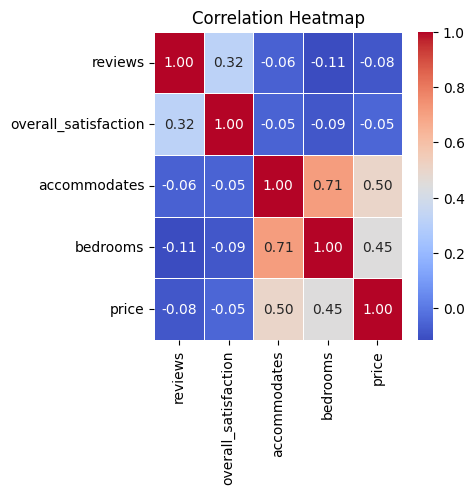

In [403]:
Features = ["reviews", "overall_satisfaction", "accommodates","bedrooms", "price"]
Corr_Features = df[Features]
Correlation_Matrix = Corr_Features.corr()
plt.figure(figsize=(4, 4))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

<p>Accommodates and Bedrooms have strong positive correlation relationship.</p>
<p>Price and Accommodates have partial positive correlation relationship.</p>
<p>Price and Bedrooms have partial positive correlation relationship.</p>

<center><h2>Thank you!</h2></center>